In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

### Read data
All other countries have the same attributes as Canada. So I just analyse this single CSV file.

In [2]:
CAvideos_df = pd.read_csv("./dataset/youtube_trading/CAvideos.csv")
CAvideos_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


### Data reviews
Although attribute 'category_id' is an integer type, but literally, only attribute 'views', 'likes', 'dislikes', 'comment_count' belong to numeric attribute.

In [3]:
CAvideos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
video_id                  40881 non-null object
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [4]:
CAvideos_df.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


#### As usual,  I will present the frequency of each category in each nominal attribute.

In [5]:
CAvideos_df['video_id'].value_counts()

UceaB4D0jpo    8
6ZfuNTqbHE8    8
VYOjWnS4cMY    8
l_lblj8Cq0o    8
7X_WvGAhMlQ    7
              ..
0VmgX9uqkhc    1
xUps49gv7ak    1
OzG7PfxNV1w    1
fkdvHo6tYM4    1
gmYVhf6-gEc    1
Name: video_id, Length: 24427, dtype: int64

In [6]:
CAvideos_df['title'].value_counts()

Drake - God's Plan (Official Audio)                                                                  15
Most Popular Violin Covers of Popular Songs 2018 || Best Instrumental Violin Covers 2018             15
Bruno Mars,Charlie Puth,Ed Sheeran Best Christmas Songs,Greatest Hits Pop Playlist Christmas 2018    13
Deleted video                                                                                        11
Merry Christmas 2018 - Top Christmas Songs Playlist 2018 - Best Christmas Songs Ever                 10
                                                                                                     ..
I Got Schooled By Italian Mozzarella Masters...                                                       1
FULL FACE USING ONLY SALLYS BEAUTY MAKEUP.. Hits & Misses | Casey Holmes                              1
Marvel Studios' Avengers: Infinity War - Official Trailer - REACTION!!!                               1
Embarrassing Phone Calls in the Library (Part 6) PRANK          

In [7]:
CAvideos_df['channel_title'].value_counts()

SET India                  192
MSNBC                      189
FBE                        188
The Young Turks            186
REACT                      183
                          ... 
Asthmatic Kitty Records      1
Dubai                        1
KSP Films                    1
Meaning Meaning              1
Pindan News                  1
Name: channel_title, Length: 5076, dtype: int64

In [8]:
CAvideos_df['category_id'].value_counts()

24    13451
25     4159
22     4105
23     3773
10     3731
17     2787
1      2060
26     2007
20     1344
28     1155
27      991
19      392
15      369
2       353
43      124
29       74
30        6
Name: category_id, dtype: int64

In [9]:
CAvideos_df['tags'].value_counts()

[none]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       2385
the real|"daytime"|"talk show"|"women"|"tamera mowry"|"adrienne bailon"|"loni love"|"jeannie mai"                                                                                                                                                                                                                                                                                                                                                                                             127
best vines 2018|"funny vines"|"funny

#### For numeric attributes, five-number summary and the count of null value will be presented.
> views: Minimum:733  Q1:143902  Median:371204  Q3:963302 Maximum:1.378431e+08

> likes: Minimum:0  Q1:2191  Median:8780  Q3:28717  Maximum:5053338

> dislikes: Minimum:0  Q1:99  Median:303  Q3:950  Maximum:1602383

> comment_count: Minimum:0  Q1:417  Median:1301  Q3:3713  Maximum:1114800

In [10]:
CAvideos_df.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


### Data visualization for numeric attributes
As we can see, some attributes have extreme skewed character.

Text(0, 0.5, 'Frequency')

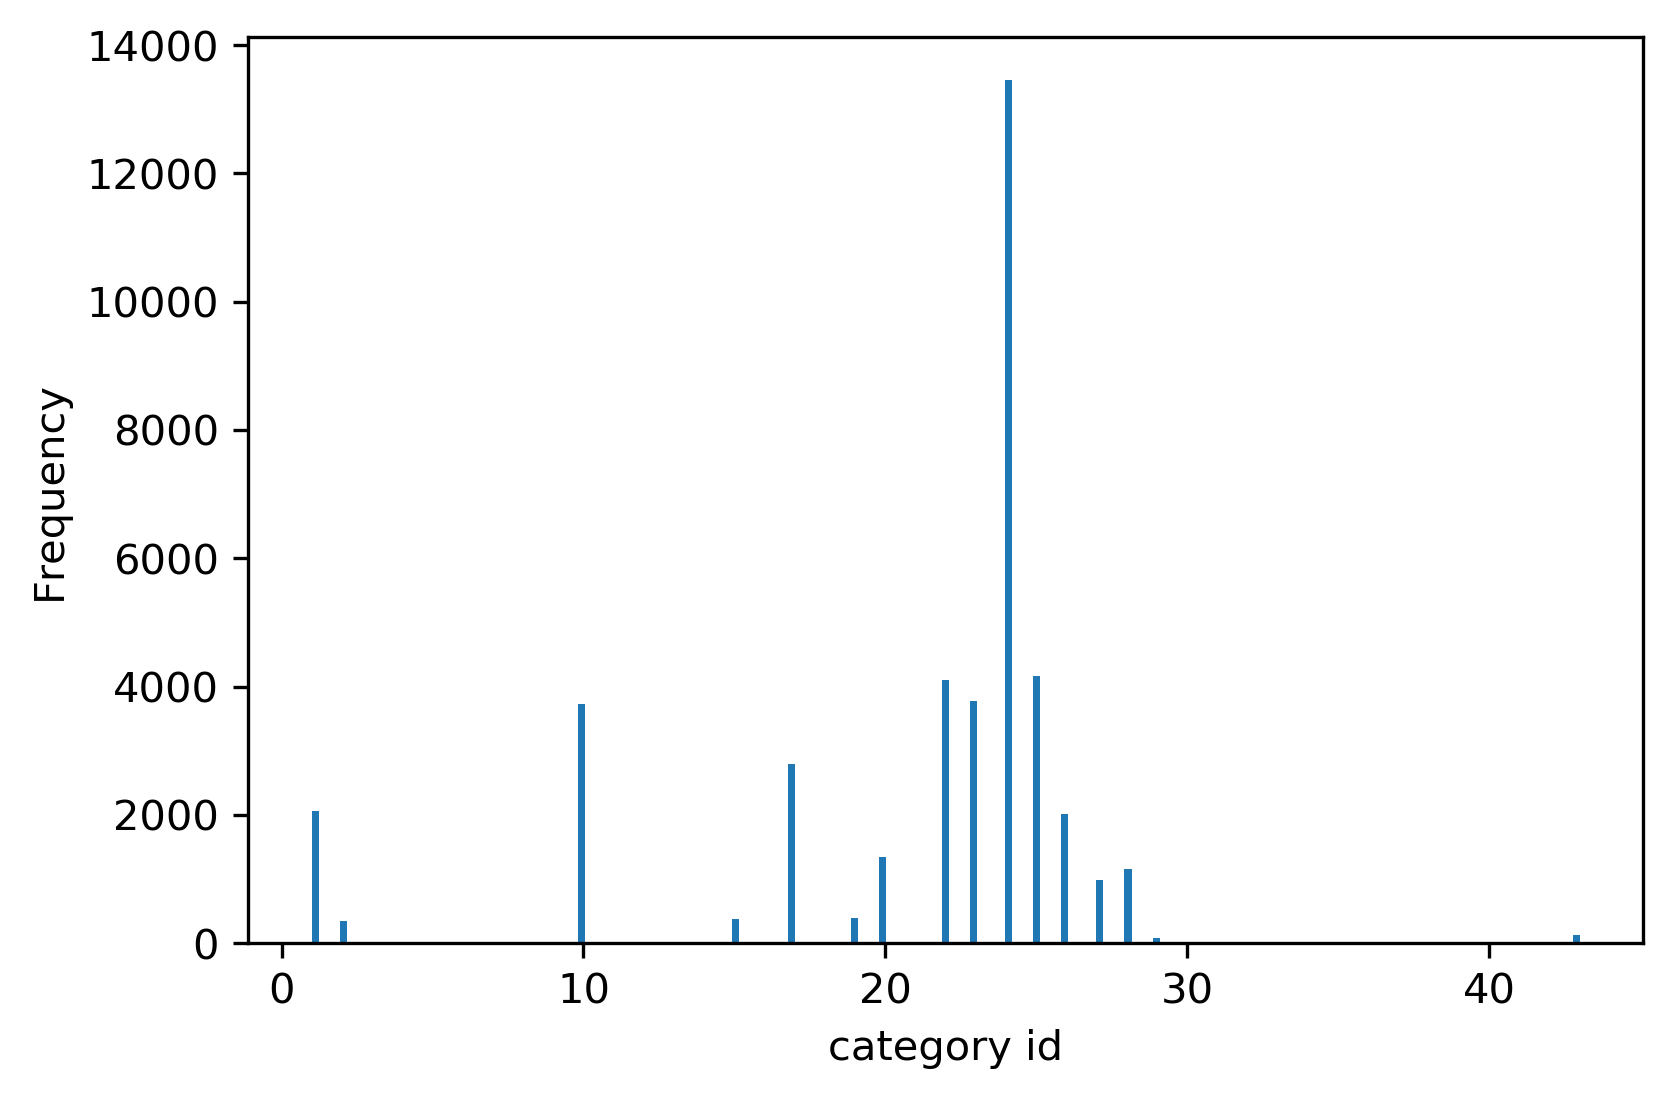

In [11]:
plt.figure(dpi=300)
plt.hist(x=CAvideos_df['category_id'], bins='auto')
plt.xlabel("category id")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

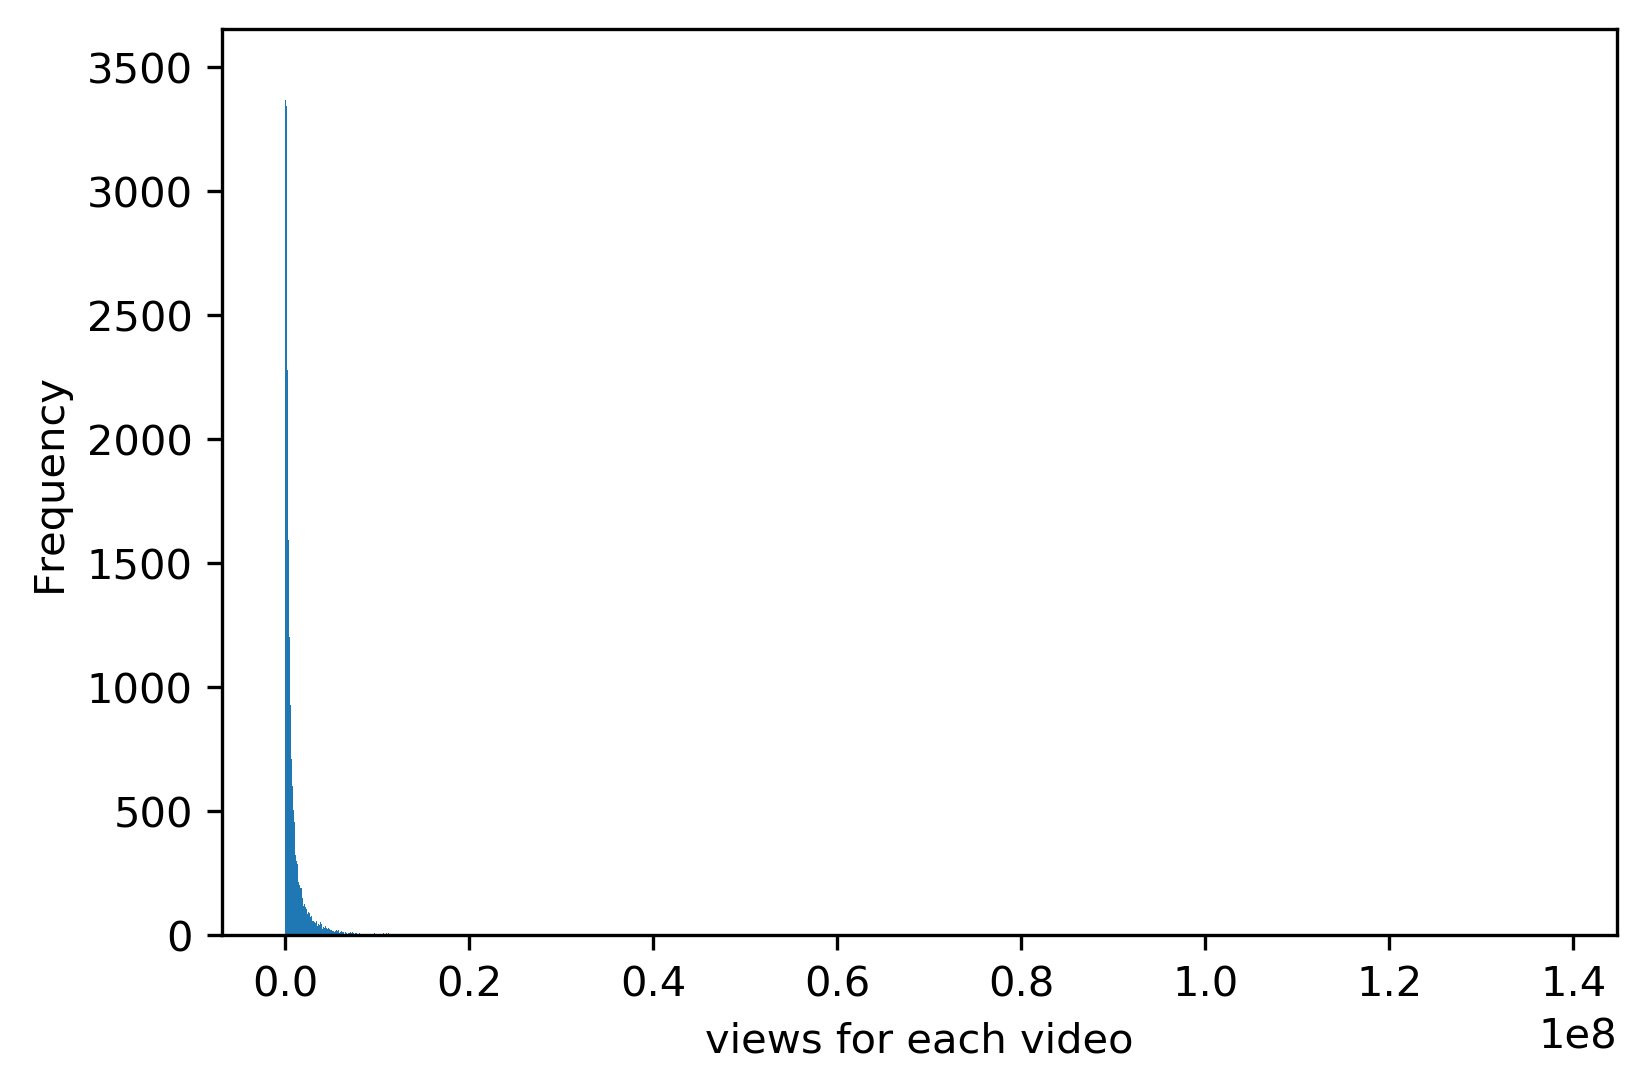

In [12]:
plt.figure(dpi=300)
plt.hist(x=CAvideos_df["views"], bins="auto")
plt.xlabel("views for each video")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

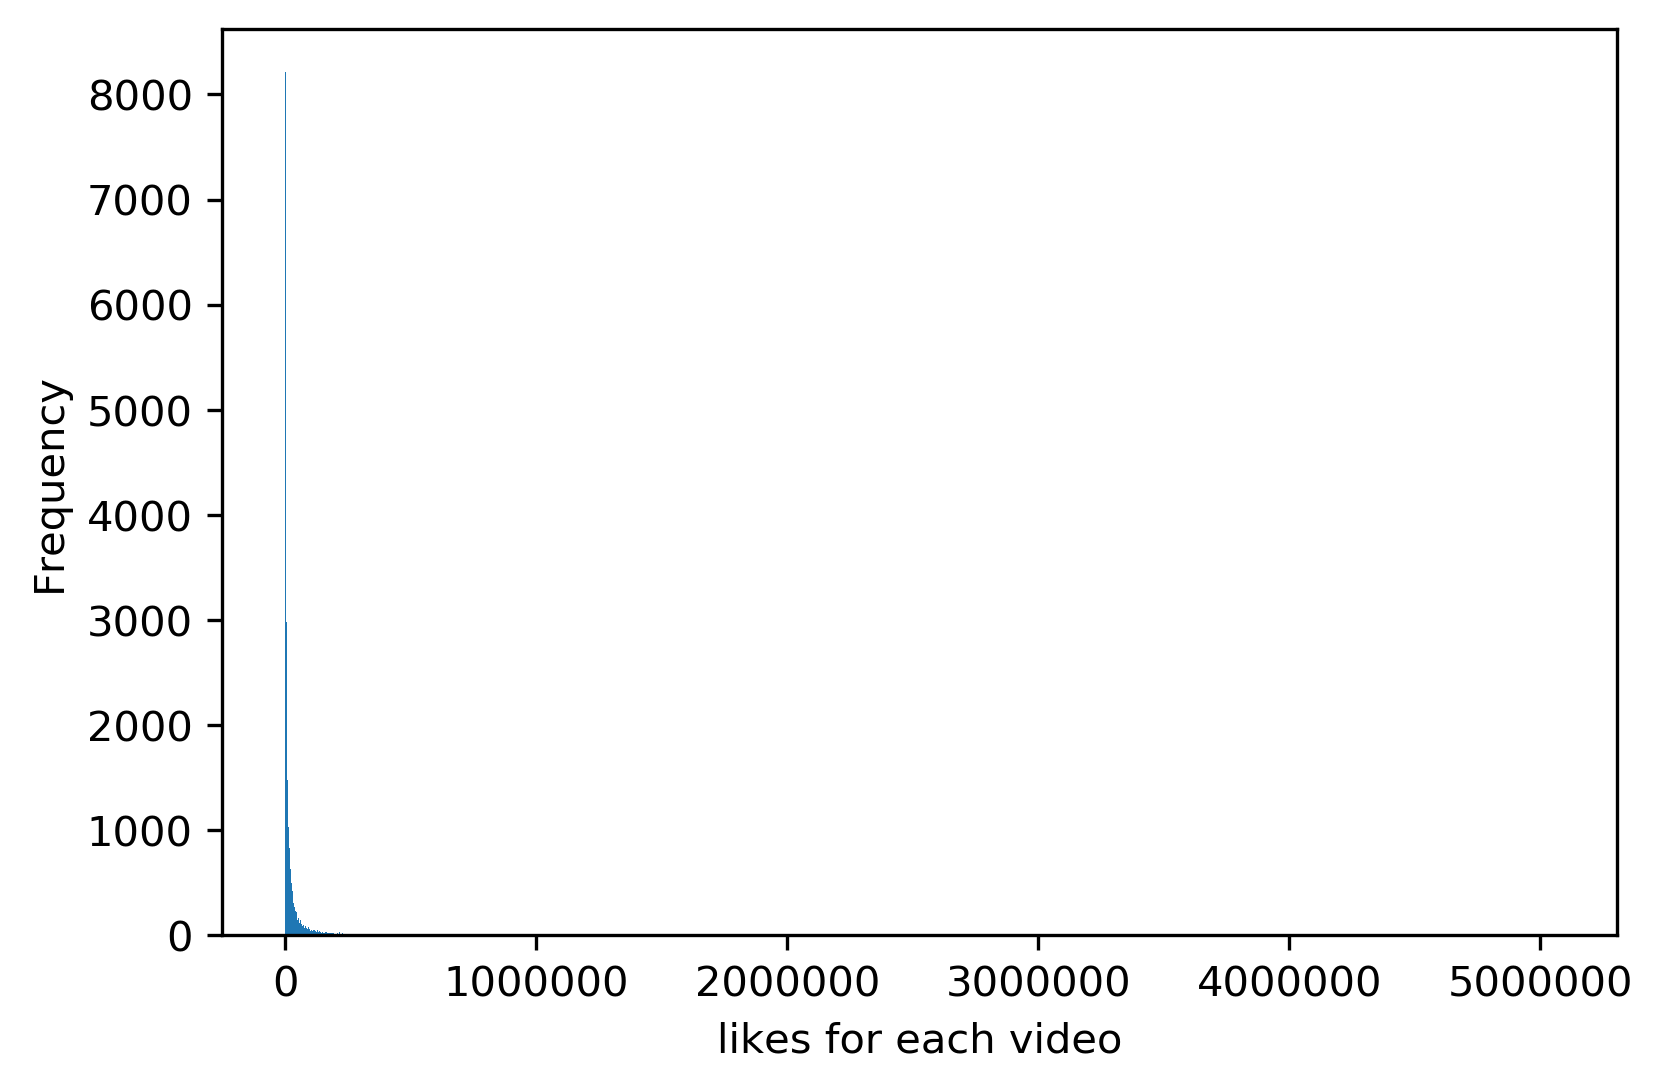

In [13]:
plt.figure(dpi=300)
plt.hist(x=CAvideos_df["likes"], bins="auto")
plt.xlabel("likes for each video")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

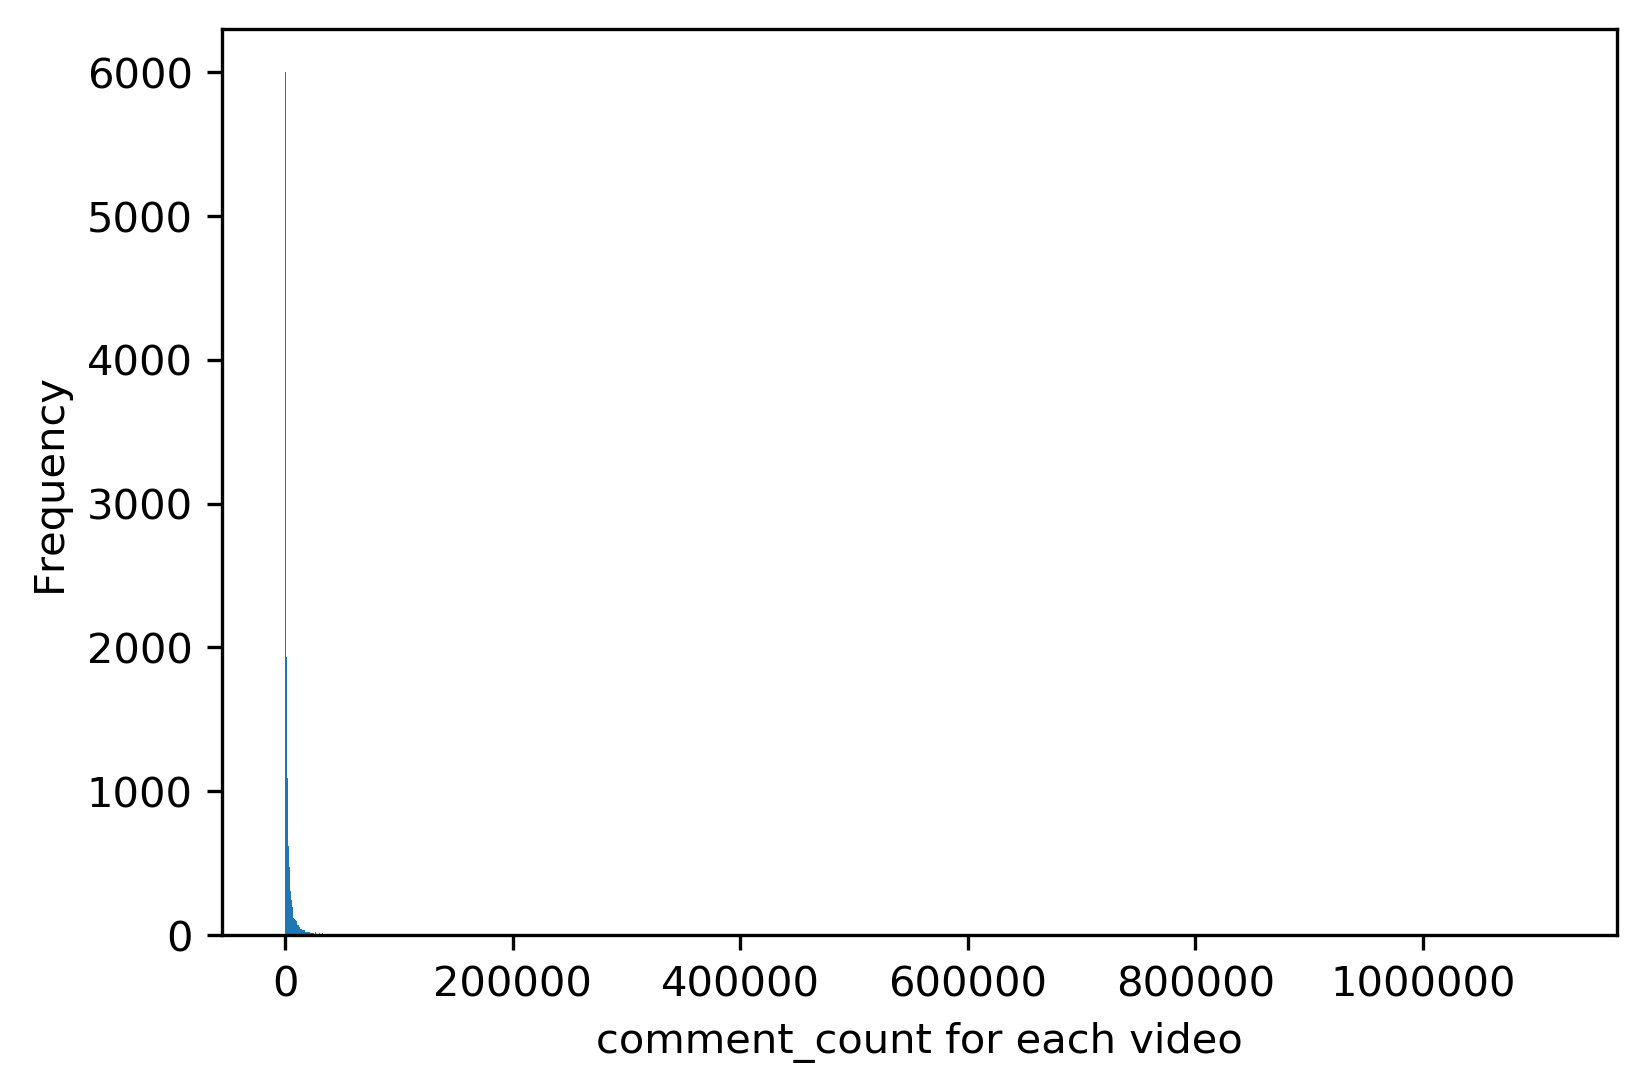

In [14]:
plt.figure(dpi=300)
plt.hist(x=CAvideos_df["comment_count"], bins="auto")
plt.xlabel("comment_count for each video")
plt.ylabel("Frequency")

In [15]:
CAvideos_df_for_boxplot = CAvideos_df[['views', 'likes', 'dislikes', 'comment_count', 'category_id']]

#### In order to make the drawing easier, we do logarithmic processing for each attribute.

In [16]:
CAvideos_df_for_boxplot['views'] = np.log(CAvideos_df_for_boxplot['views'] + 1)
CAvideos_df_for_boxplot['likes'] = np.log(CAvideos_df_for_boxplot['likes'] + 1)
CAvideos_df_for_boxplot['dislikes'] = np.log(CAvideos_df_for_boxplot['dislikes'] + 1)
CAvideos_df_for_boxplot['comment_count'] = np.log(CAvideos_df_for_boxplot['comment_count'] + 1)

#### Next, I will draw a boxplot for each numerical attribute according to each category ID.

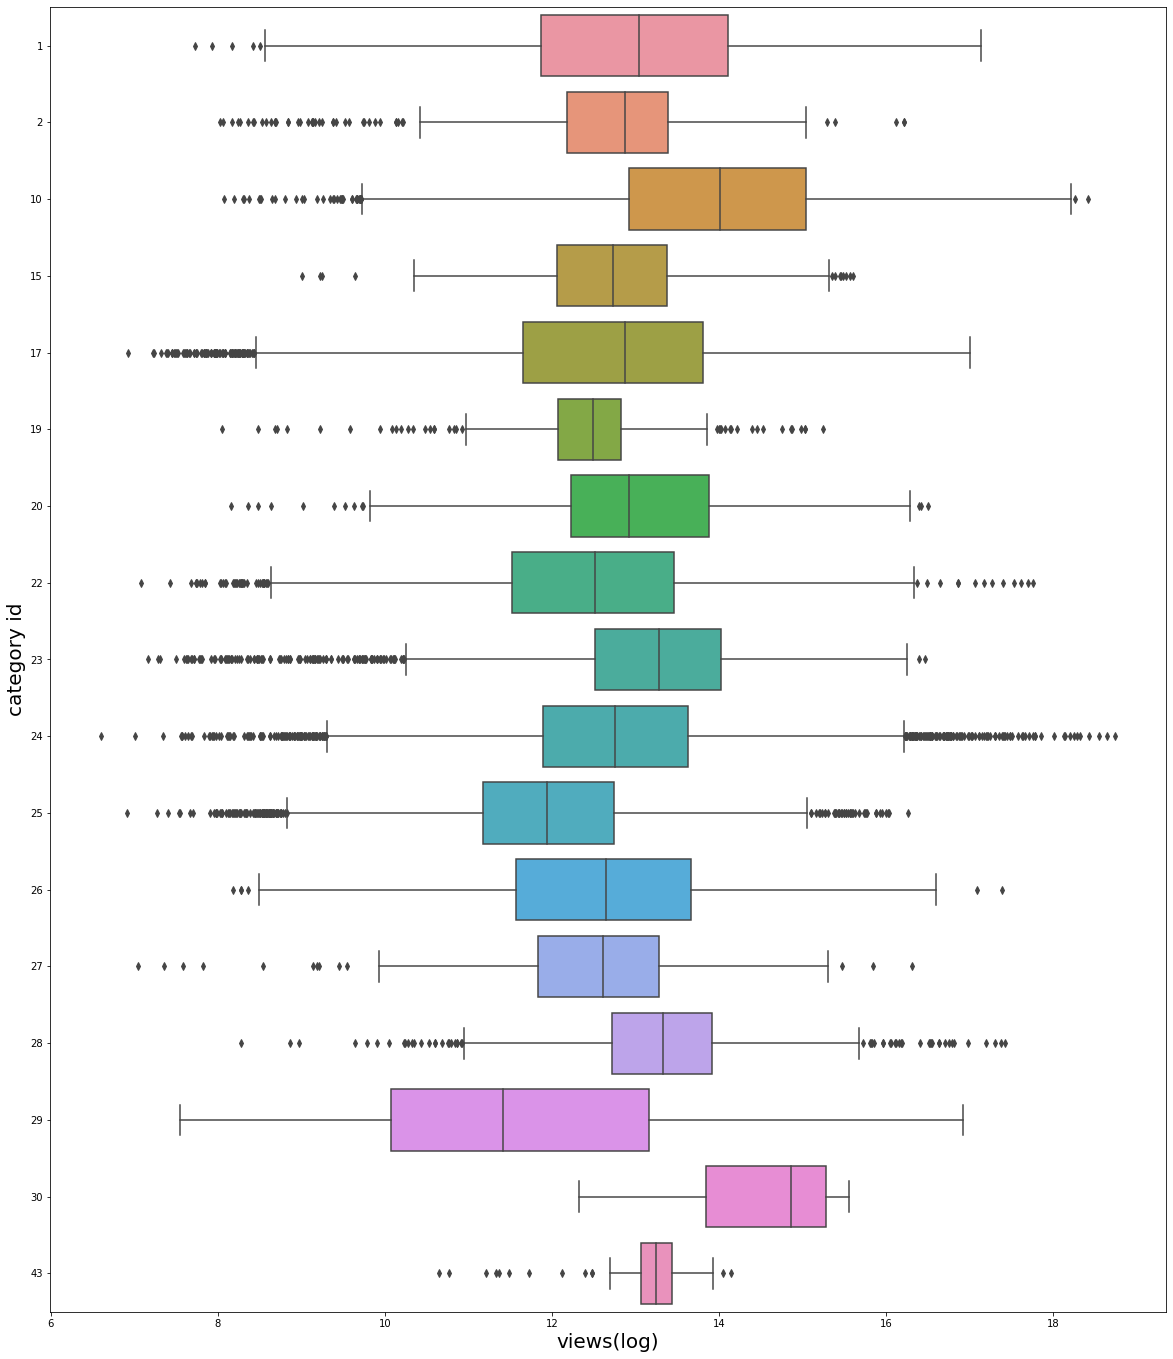

In [17]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 24))
ax = sns.boxplot(y="category_id", x='views', data=CAvideos_df_for_boxplot, orient="h")
plt.xlabel('views(log)', fontsize=20)
plt.ylabel('category id', fontsize=20)
plt.show()

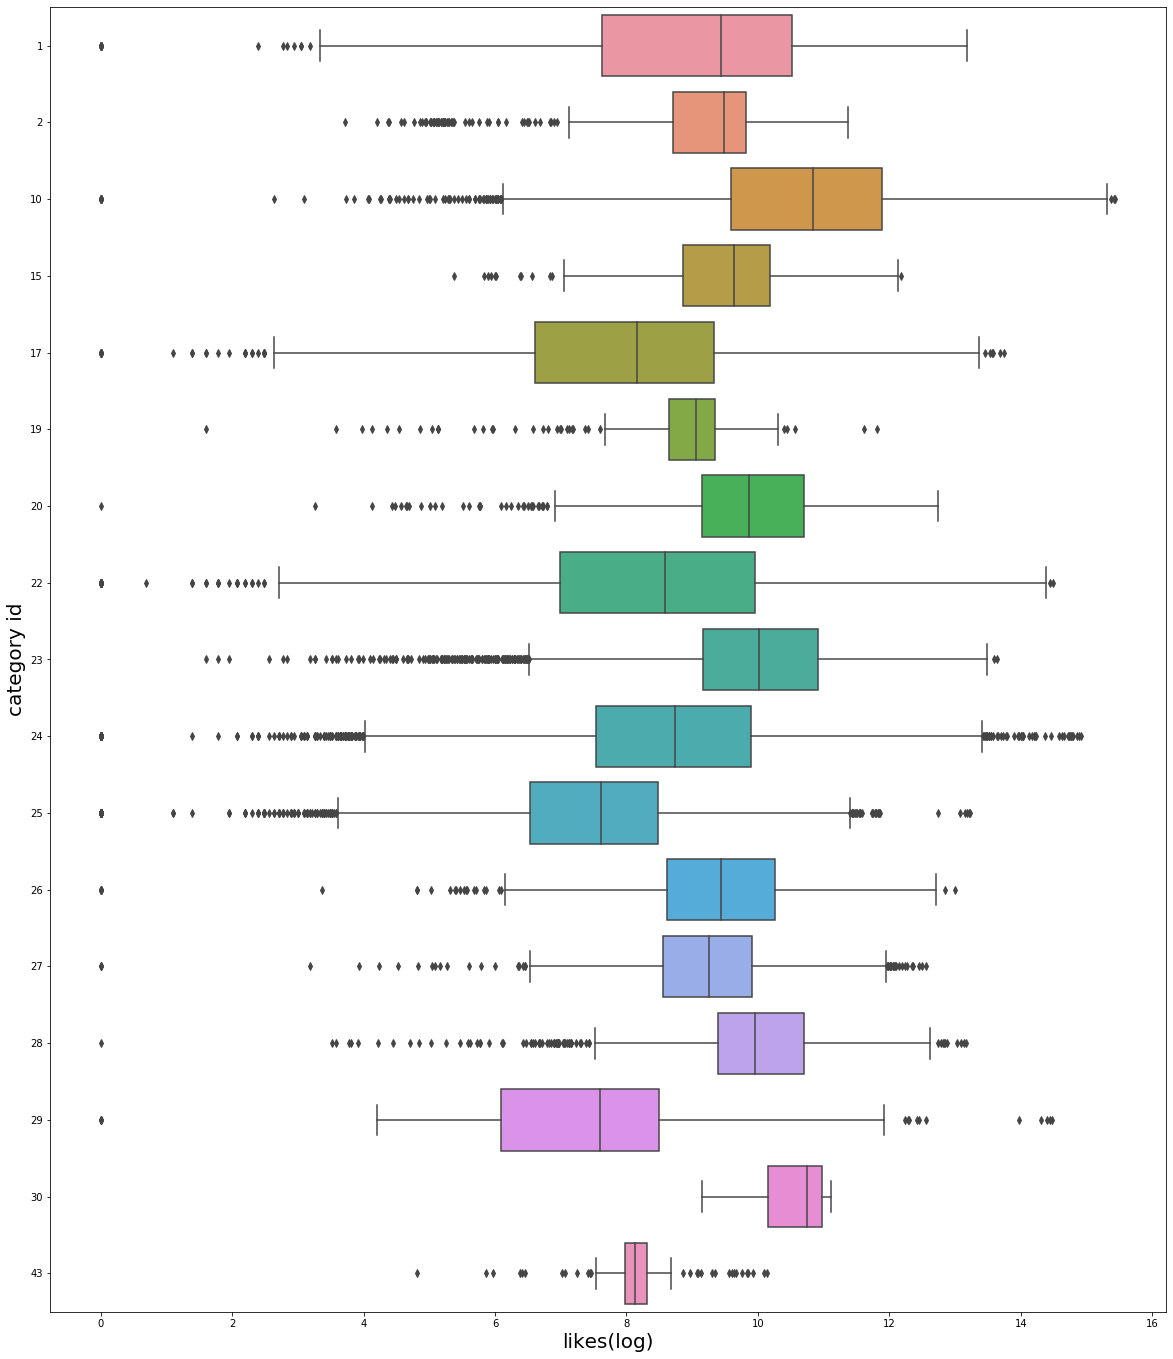

In [18]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 24))
ax = sns.boxplot(y="category_id", x='likes', data=CAvideos_df_for_boxplot, orient="h")
plt.xlabel('likes(log)', fontsize=20)
plt.ylabel('category id', fontsize=20)
plt.show()

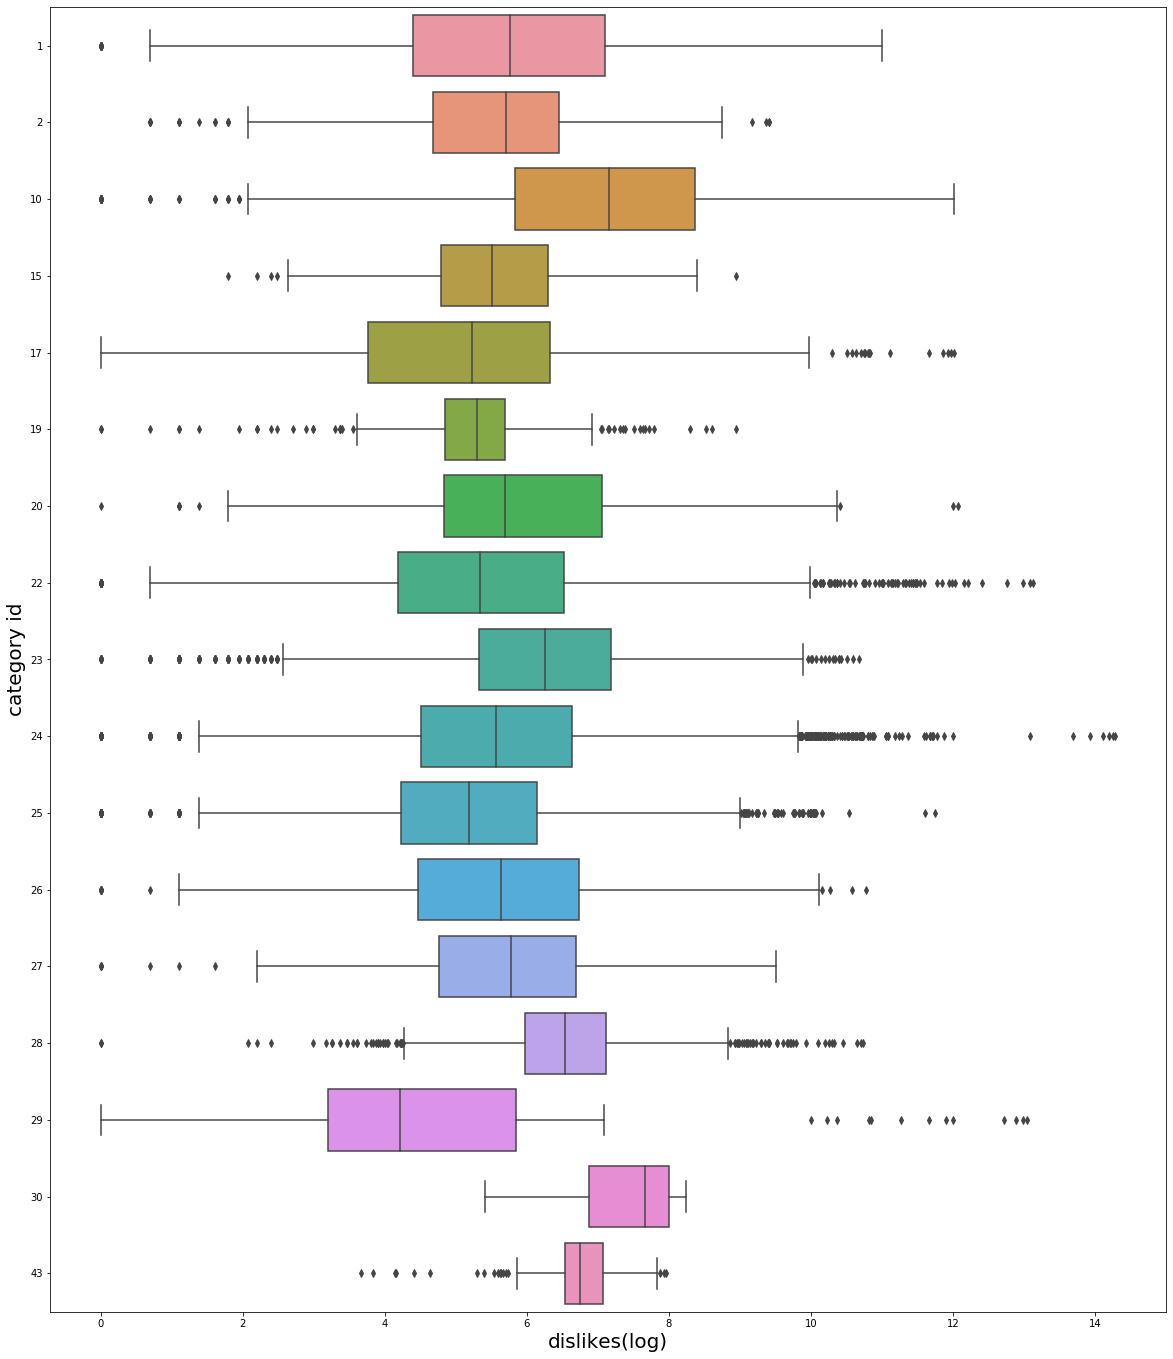

In [19]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 24))
ax = sns.boxplot(y="category_id", x='dislikes', data=CAvideos_df_for_boxplot, orient="h")
plt.xlabel('dislikes(log)', fontsize=20)
plt.ylabel('category id', fontsize=20)
plt.show()

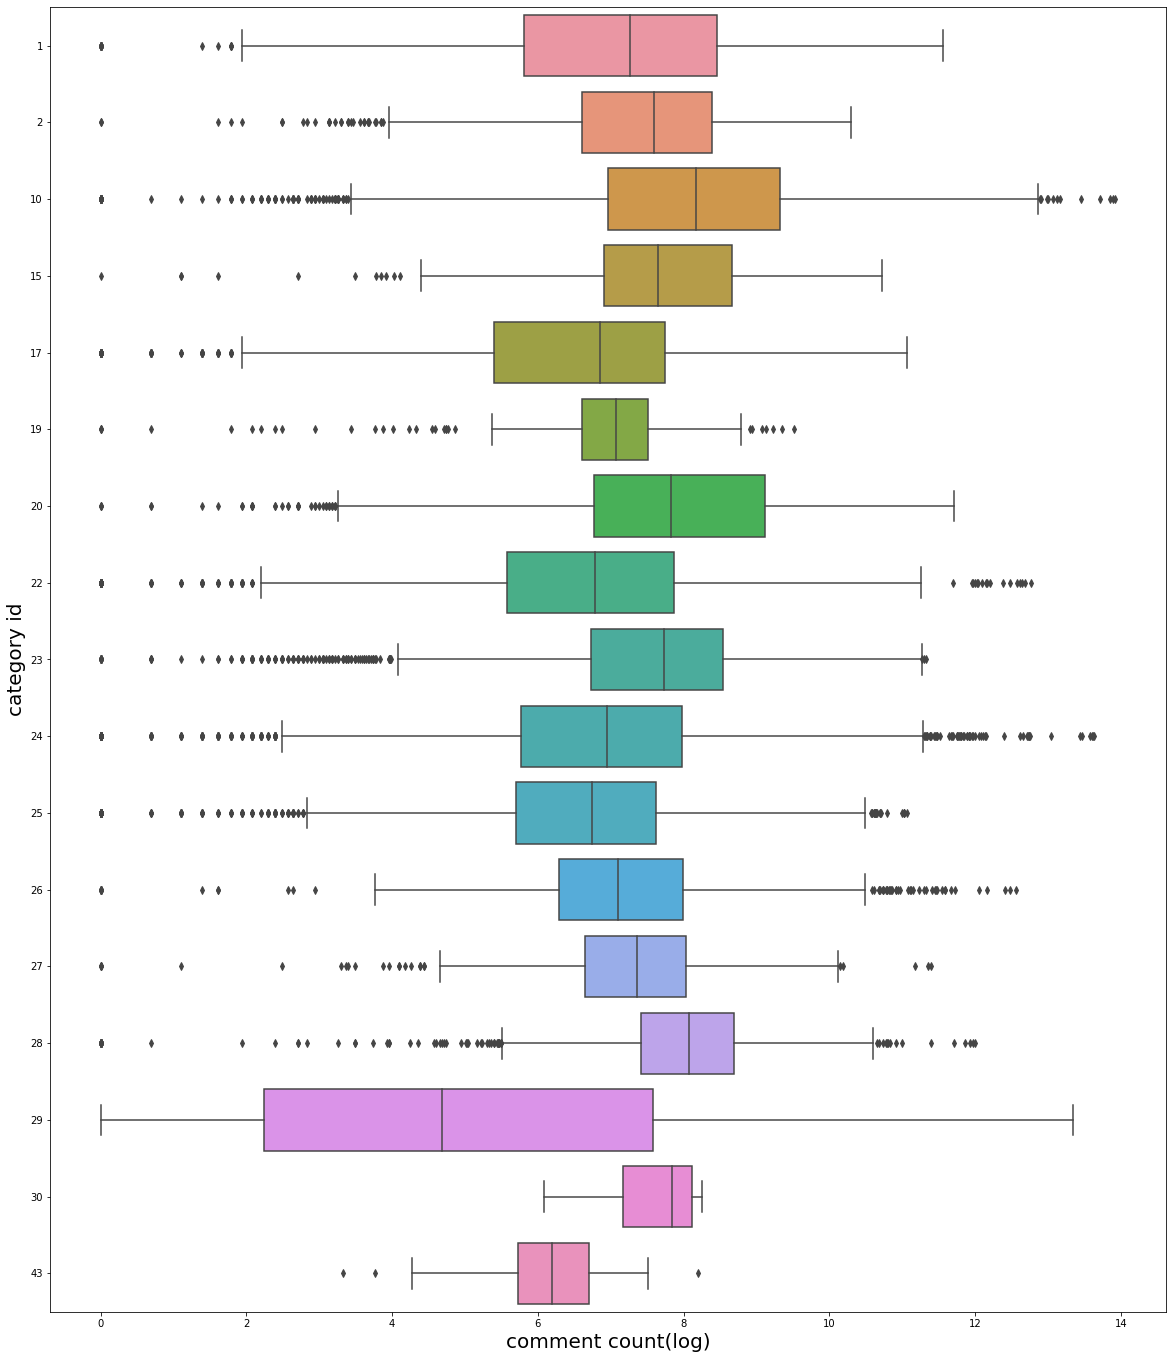

In [20]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 24))
ax = sns.boxplot(y="category_id", x='comment_count', data=CAvideos_df_for_boxplot, orient="h")
plt.xlabel('comment count(log)', fontsize=20)
plt.ylabel('category id', fontsize=20)
plt.show()

### Handle null values

In [21]:
def nullplot(data):
    '''
    data: a dataframe on which we want to perform null plot
    '''
    df_null = data.isna()
    nulls_percent_per_col = df_null.sum(axis=0) / len(data)
    
    plt.figure(dpi=600)
    fig, (ax_1, ax_2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 10))
    
    pla = matplotlib.cm.get_cmap("plasma")
    colormap = matplotlib.colors.ListedColormap([pla(0), 'gold'])
    sns.heatmap(data.isnull(), cmap=colormap, ax=ax_1, cbar=False, yticklabels=False)
    nulls_percent_per_col.plot(kind="bar", color="gold", x=nulls_percent_per_col, y=nulls_percent_per_col.index, 
                               ax=ax_2, label="Null value percent")
    ax_2.set_ylim((0,1))
    plt.show()

Only attribute 'description' has a few of null values.

<Figure size 3600x2400 with 0 Axes>

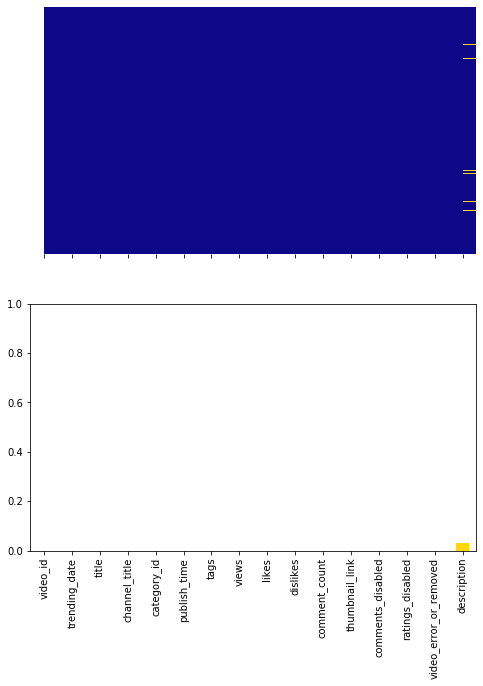

In [22]:
CAvideos_df_2 = CAvideos_df.copy()
nullplot(CAvideos_df_2)

In [23]:
CAvideos_df_2.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

#### Eliminate null values --- drop rows

<Figure size 3600x2400 with 0 Axes>

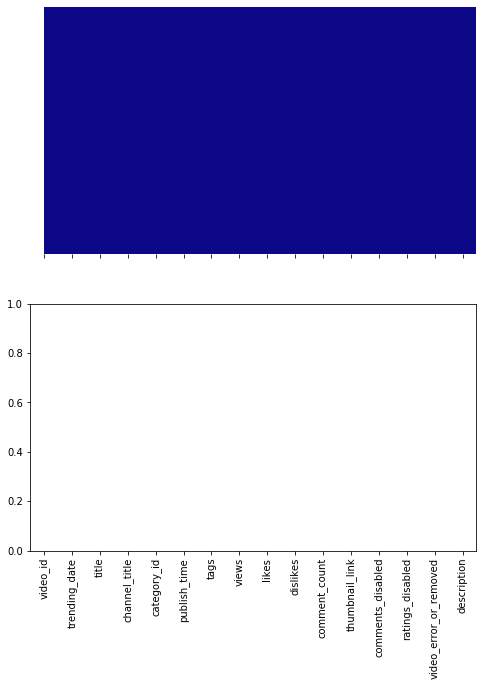

In [24]:
CAvideos_df_3 = CAvideos_df.copy()
CAvideos_df_3 = CAvideos_df_3.dropna(axis=0)
nullplot(CAvideos_df_3)